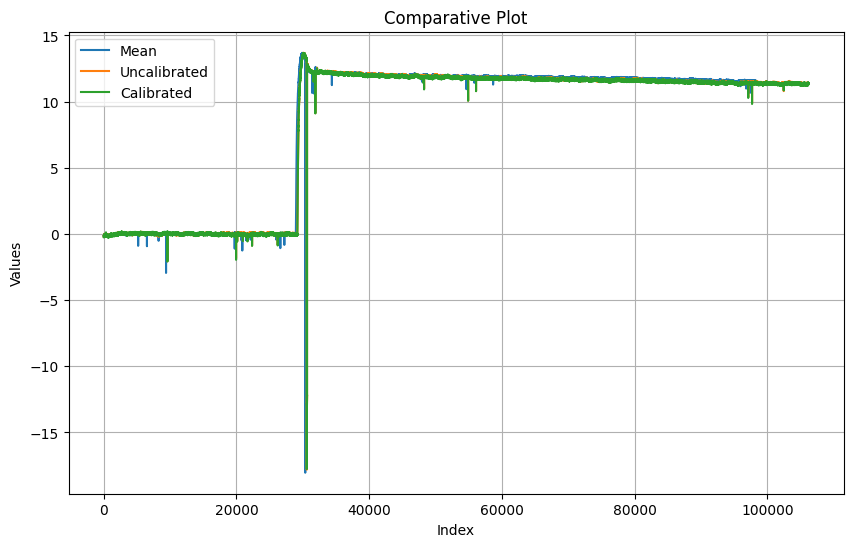

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV files
file1 = '6_run_hpm7177.csv'
file2 = '7_temperature_step_ppm.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Plotting
plt.figure(figsize=(10, 6))

# Plot data from the first file
plt.plot(df1['mean'], label='Mean', color='C0')

# Plot data from the second file
plt.plot(df2['uncalibrated'], label='Uncalibrated', color='C1')
plt.plot(df2['calibrated'], label='Calibrated', color='C2')

plt.title('Comparative Plot')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Define a function to remove outliers
def remove_outliers(data):
    Q1 = np.percentile(data, 5)
    Q3 = np.percentile(data, 95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]


# we use a centered moving average to smooth the data withour introducing a lag
def centered_moving_average(data, window_size):
    """Compute a centered moving average."""
    half_window = window_size // 2
    extended_data = np.pad(data, (half_window, half_window), mode='edge')
    cumsum = np.cumsum(extended_data)
    
    # Subtract the cumulated sum shifted by the window size from the cumulated sum 
    # to get the sum over the window for each point
    sum_window = cumsum[window_size:] - cumsum[:-window_size]
    return sum_window / window_size

In [4]:

FLUKE_OS = 200


data_8588 = df1['mean'] - df1['mean'][0]

data_hpm_calibrated = df2['calibrated'] - df2['calibrated'][FLUKE_OS]
data_hpm_uncalibrated = df2['uncalibrated'] - df2['uncalibrated'][FLUKE_OS]

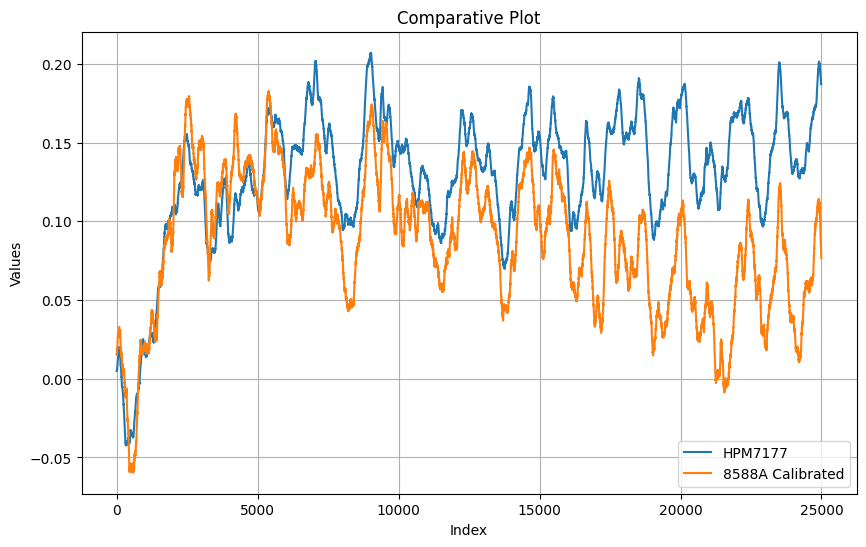

In [5]:
plt.figure(figsize=(10, 6))

# Plot data from the first file
plt.plot(centered_moving_average(remove_outliers(data_8588[:25000]),100), label='HPM7177', color='C0')

# Plot data from the second file
plt.plot(centered_moving_average(remove_outliers(data_hpm_calibrated[FLUKE_OS:FLUKE_OS+25000]),100), label='8588A Calibrated', color='C1')
#plt.plot(centered_moving_average(remove_outliers(data_hpm_uncalibrated[FLUKE_OS:FLUKE_OS+25000]),100), label='8588A Unalibrated', color='C2')


plt.title('Comparative Plot')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
